# Cory Peshkin Final Project
## Data Bootcamp

### Importing necessary files and libraries

In [1]:
import os
import time
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec

In [2]:
atickerspath = "~/Desktop/Jupyter/Final/a_share_tickers50.xlsx"
htickerspath = "~/Desktop/Jupyter/Final/h_share_tickers50.xlsx"
a_indexsnaps = "~/Desktop/Jupyter/Final/a_index_snap50.xlsx"
h_indexsnaps = "~/Desktop/Jupyter/Final/h_index_snap50.xlsx"
spotfxpath = "~/Desktop/Jupyter/Final/spot_fx_quotes.xlsx"

In [3]:
a_tickers = pd.read_excel(atickerspath)
h_tickers = pd.read_excel(htickerspath)
fx_quotes = pd.read_excel(spotfxpath)
a_snaps = pd.read_excel(a_indexsnaps)
h_snaps = pd.read_excel(h_indexsnaps)

In [4]:
a_tickers.head()

,601939 CH Equity,601398 CH Equity,601857 CH Equity,601318 CH Equity,601988 CH Equity,600030 CH Equity,601998 CH Equity,600036 CH Equity,600016 CH Equity,601088 CH Equity,...,600958 CH Equity.2,600808 CH Equity.2,600332 CH Equity.2,600999 CH Equity.2,601788 CH Equity.2,600027 CH Equity.2,601107 CH Equity.2,600026 CH Equity.2,601319 CH Equity.2,601228 CH Equity.2
NaN,Official Closing Price,Official Closing Price,Official Closing Price,Official Closing Price,Official Closing Price,Official Closing Price,Official Closing Price,Official Closing Price,Official Closing Price,Official Closing Price,...,Free Float Percent,Free Float Percent,Free Float Percent,Free Float Percent,Free Float Percent,Free Float Percent,Free Float Percent,Free Float Percent,Free Float Percent,Free Float Percent
Dates,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,PX_OFFICIAL_CLOSE,...,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT,EQY_FREE_FLOAT_PCT
2012-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.8761,26.2956,19.9208,20.6558,19.2761,25.3098,25.0102,NaN,NaN
2012-05-22 00:00:00,4.54,4.23,9.56,21.285,2.99,13.3,4.34,11.585,4.611,26.26,...,NaN,34.8761,26.2956,19.9208,20.6558,19.2761,25.3098,25.0102,NaN,NaN
2012-05-23 00:00:00,4.5,4.18,9.56,21.105,2.99,13.6,4.29,11.516,4.549,25.93,...,NaN,34.8761,26.2956,19.9208,20.6558,19.2761,25.3098,25.0102,NaN,NaN


In [5]:
a_tickers['600030 CH Equity.1'].head(4)

NaN                    Current Shares Outstanding
Dates                                  EQY_SH_OUT
2012-05-21 00:00:00                       9838.58
2012-05-22 00:00:00                       9838.58
Name: 600030 CH Equity.1, dtype: object

### Cleaning the data

In [6]:
a_tickers = a_tickers.iloc[2:]
h_tickers = h_tickers.iloc[2:]
a_tickers = a_tickers.fillna(0)
h_tickers = h_tickers.fillna(0)

In [7]:
acols = a_tickers.columns.tolist()
hcols = h_tickers.columns.tolist()
acolsbase = acols[0:73]
hcolsbase = hcols[0:73]
a_tickers[acolsbase].head(4)

,601939 CH Equity,601398 CH Equity,601857 CH Equity,601318 CH Equity,601988 CH Equity,600030 CH Equity,601998 CH Equity,600036 CH Equity,600016 CH Equity,601088 CH Equity,...,600958 CH Equity,600808 CH Equity,600332 CH Equity,600999 CH Equity,601788 CH Equity,600027 CH Equity,601107 CH Equity,600026 CH Equity,601319 CH Equity,601228 CH Equity
2012-05-21 00:00:00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.000,0.000,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2012-05-22 00:00:00,4.54,4.23,9.56,21.285,2.99,13.30,4.34,11.585,4.611,26.26,...,0.0,2.44,22.21,13.19,13.69,3.23,3.93,5.93,0.0,0.0
2012-05-23 00:00:00,4.50,4.18,9.56,21.105,2.99,13.60,4.29,11.516,4.549,25.93,...,0.0,2.42,24.43,13.31,13.96,3.24,3.86,5.87,0.0,0.0
2012-05-24 00:00:00,4.49,4.19,9.51,21.020,3.00,13.44,4.25,11.408,4.444,25.98,...,0.0,2.42,24.92,13.11,13.91,3.21,3.79,5.85,0.0,0.0


### Create a list for A and H shares to represent snapshots of the index's constituents

In [8]:
a_snap_cols = a_snaps.columns.tolist()
h_snap_cols = h_snaps.columns.tolist()
len(a_snap_cols)

16

In [9]:
alist1 = list(a_snaps[a_snap_cols[0]])
alist2 = a_snaps[a_snap_cols[1]]
alist3 = a_snaps[a_snap_cols[2]]
alist4 = a_snaps[a_snap_cols[3]]
alist5 = a_snaps[a_snap_cols[4]]
alist6 = a_snaps[a_snap_cols[5]]
alist7 = a_snaps[a_snap_cols[6]]
alist8 = a_snaps[a_snap_cols[7]]
alist9 = a_snaps[a_snap_cols[8]]
alist10 = a_snaps[a_snap_cols[9]]
alist11 = a_snaps[a_snap_cols[10]]
alist12 = a_snaps[a_snap_cols[11]]
alist13 = a_snaps[a_snap_cols[12]]
alist14 = a_snaps[a_snap_cols[13]]
alist15 = a_snaps[a_snap_cols[14]]
alist16 = a_snaps[a_snap_cols[15]]

In [10]:
hlist1 = list(h_snaps[h_snap_cols[0]])
hlist2 = list(h_snaps[h_snap_cols[1]])
hlist3 = list(h_snaps[h_snap_cols[2]])
hlist4 = list(h_snaps[h_snap_cols[3]])
hlist5 = list(h_snaps[h_snap_cols[4]])
hlist6 = list(h_snaps[h_snap_cols[5]])
hlist7 = list(h_snaps[h_snap_cols[6]])
hlist8 = list(h_snaps[h_snap_cols[7]])
hlist9 = list(h_snaps[h_snap_cols[8]])
hlist10 = list(h_snaps[h_snap_cols[9]])
hlist11 = list(h_snaps[h_snap_cols[10]])
hlist12 = list(h_snaps[h_snap_cols[11]])
hlist13 = list(h_snaps[h_snap_cols[12]])
hlist14 = list(h_snaps[h_snap_cols[13]])
hlist15 = list(h_snaps[h_snap_cols[14]])
hlist16 = list(h_snaps[h_snap_cols[15]])

In [11]:
period_start = pd.datetime(2012,6,1)
date_end = pd.datetime(2019,4,30)
count = 0
while count < 15:
    a1 = a_tickers.loc[(a_tickers.index >= period_start)&(a_tickers.index < a_snap_cols[1])]
    a2 = a_tickers.loc[(a_tickers.index >= a_snap_cols[1])&(a_tickers.index < a_snap_cols[2])]
    a3 = a_tickers.loc[(a_tickers.index >= a_snap_cols[2])&(a_tickers.index < a_snap_cols[3])]
    a4 = a_tickers.loc[(a_tickers.index >= a_snap_cols[3])&(a_tickers.index < a_snap_cols[4])]
    a5 = a_tickers.loc[(a_tickers.index >= a_snap_cols[4])&(a_tickers.index < a_snap_cols[5])]
    a6 = a_tickers.loc[(a_tickers.index >= a_snap_cols[5])&(a_tickers.index < a_snap_cols[6])]
    a7 = a_tickers.loc[(a_tickers.index >= a_snap_cols[6])&(a_tickers.index < a_snap_cols[7])]
    a8 = a_tickers.loc[(a_tickers.index >= a_snap_cols[7])&(a_tickers.index < a_snap_cols[8])]
    a9 = a_tickers.loc[(a_tickers.index >= a_snap_cols[8])&(a_tickers.index < a_snap_cols[9])]
    a10 = a_tickers.loc[(a_tickers.index >= a_snap_cols[9])&(a_tickers.index < a_snap_cols[10])]
    a11 = a_tickers.loc[(a_tickers.index >= a_snap_cols[10])&(a_tickers.index < a_snap_cols[11])]
    a12 = a_tickers.loc[(a_tickers.index >= a_snap_cols[11])&(a_tickers.index < a_snap_cols[12])]
    a13 = a_tickers.loc[(a_tickers.index >= a_snap_cols[12])&(a_tickers.index < a_snap_cols[13])]
    a14 = a_tickers.loc[(a_tickers.index >= a_snap_cols[13])&(a_tickers.index < a_snap_cols[14])]
    a15 = a_tickers.loc[(a_tickers.index >= a_snap_cols[14])&(a_tickers.index < date_end)]
    count = count + 1

In [12]:
h1 = h_tickers.loc[(h_tickers.index >= period_start)&(h_tickers.index < h_snap_cols[1])]
h2 = h_tickers.loc[(h_tickers.index >= h_snap_cols[1])&(h_tickers.index < h_snap_cols[2])]
h3 = h_tickers.loc[(h_tickers.index >= h_snap_cols[2])&(h_tickers.index < h_snap_cols[3])]
h4 = h_tickers.loc[(h_tickers.index >= h_snap_cols[3])&(h_tickers.index < h_snap_cols[4])]
h5 = h_tickers.loc[(h_tickers.index >= h_snap_cols[4])&(h_tickers.index < h_snap_cols[5])]
h6 = h_tickers.loc[(h_tickers.index >= h_snap_cols[5])&(h_tickers.index < h_snap_cols[6])]
h7 = h_tickers.loc[(h_tickers.index >= h_snap_cols[6])&(h_tickers.index < h_snap_cols[7])]
h8 = h_tickers.loc[(h_tickers.index >= h_snap_cols[7])&(h_tickers.index < h_snap_cols[8])]
h9 = h_tickers.loc[(h_tickers.index >= h_snap_cols[8])&(h_tickers.index < h_snap_cols[9])]
h10 = h_tickers.loc[(h_tickers.index >= h_snap_cols[9])&(h_tickers.index < h_snap_cols[10])]
h11 = h_tickers.loc[(h_tickers.index >= h_snap_cols[10])&(h_tickers.index < h_snap_cols[11])]
h12 = h_tickers.loc[(h_tickers.index >= h_snap_cols[11])&(h_tickers.index < h_snap_cols[12])]
h13 = h_tickers.loc[(h_tickers.index >= h_snap_cols[12])&(h_tickers.index < h_snap_cols[13])]
h14 = h_tickers.loc[(h_tickers.index >= h_snap_cols[13])&(h_tickers.index < h_snap_cols[14])]
h15 = h_tickers.loc[(h_tickers.index >= h_snap_cols[14])&(h_tickers.index < date_end)]

In [13]:
ah_index = pd.DataFrame()
a_list = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15]
h_list = [h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15]
a_lister = [alist1, alist2, alist3, alist4, alist5, alist6, alist7, alist8, alist9, alist10, alist11, alist12, alist13, alist14, alist15]
h_lister = [hlist1, hlist2, hlist3, hlist4, hlist5, hlist6, hlist7, hlist8, hlist9, hlist10, hlist11, hlist12, hlist13, hlist14, hlist15]

In [14]:
#generate OS column list for replacement
a_os_list = []
for indv_list in a_lister:
    indv_list = [i + ".1" for i in indv_list]
    a_os_list.append(indv_list)

h_os_list = []
for indv_list in h_lister:
    indv_list = [i + ".1" for i in indv_list]
    h_os_list.append(indv_list)
    
#generate FF column list for replacement
a_ff_list = []
for indv_list in a_lister:
    indv_list = [i + ".2" for i in indv_list]
    a_ff_list.append(indv_list)

h_ff_list = []
for indv_list in h_lister:
    indv_list = [i + ".2" for i in indv_list]
    h_ff_list.append(indv_list)

In [15]:
print(len(a_os_list[1]),len(a_os_list[6]))
# i.e. max holdings

50 50


In [16]:
print(a1.shape, a4.shape, a8.shape, a11.shape)

(70, 219) (94, 219) (51, 219) (238, 219)


In [17]:
print(h1.shape, h4.shape, h8.shape, h11.shape)

(70, 219) (94, 219) (51, 219) (238, 219)


In [18]:
fx_quotes.head(4)

,Dates,USDCNY Curncy,USDHKD Curncy
0,2012-05-01,6.2774,7.7582
1,2012-05-02,6.3075,7.7587
2,2012-05-03,6.3053,7.7593
3,2012-05-04,6.3061,7.7608


### Function to generate the AH Premium using cleaned and prepared files as inputs

In [19]:
count = 0
final_indiv = pd.DataFrame()
ah_rep_index = pd.DataFrame()
for adf, hdf in zip(a_list, h_list):
# have to reset matricies for FX conversion
    fx_quotes = pd.read_excel(spotfxpath)
    fx_quotes = fx_quotes.set_index('Dates')
    a_prem = pd.DataFrame()
    h_prem = pd.DataFrame()
    
    adfcols = adf.columns.tolist()
    hdfcols = hdf.columns.tolist()
    adfcolsbase = adfcols[0:73]
    hdfcolsbase = adfcolsbase

#split across all tickers
    adf_colspx = adfcols[0:73]
    hdf_colspx = hdfcols[0:73] 
    adf_colsos = adfcols[73:146]
    hdf_colsos = hdfcols[73:146]
    adf_colsff = adfcols[146:219]
    hdf_colsff = hdfcols[146:219]
    a_px = adf[adf_colspx]
    a_os = adf[adf_colsos]
    a_ff = adf[adf_colsff]
    h_px = hdf[hdf_colspx]
    h_os = hdf[hdf_colsos]
    h_ff = hdf[hdf_colsff]


#split w/ new name for time-senstitive tickers
    a_px = a_px[a_lister[count]]
    a_os = a_os[a_os_list[count]]
    a_ff = a_ff[a_ff_list[count]]
    h_px = h_px[h_lister[count]]
    h_os = h_os[h_os_list[count]]
    h_ff = h_ff[h_ff_list[count]]
    
#Correct for Bloomberg Units
    a_os = a_os.multiply(1000)
    h_os = h_os.multiply(1000)
    a_ff = a_ff.div(100)
    h_ff = h_ff.div(100)
    
#Check for missing rows    
    dataset_ah = (a_px, a_os, a_ff, h_px, h_os, h_ff)
    for df in dataset_ah:
        null_df = df[df.isnull().any(axis=1)]
        if len(null_df) != 0:
            print("Missing values in a dataframe")
            
    a_flos_adj = (a_os.values * a_ff.values)
    h_flos_adj = (h_os.values * h_ff.values)
    adj_flos = a_flos_adj + h_flos_adj
        
    numerator = adj_flos * a_px.values
    denominator = adj_flos * h_px.values
    numerator = pd.DataFrame(data = numerator, index=a_os.index, columns=a_px.columns)
    denominator = pd.DataFrame(data = denominator, index=h_os.index, columns=h_px.columns)

#slicing only the dates we need for the fx spot matrix
    fx_dates = fx_quotes.index.tolist()
    dates = numerator.index.tolist()
    excessfx = []
    excessfx = np.setdiff1d(fx_dates, dates)
    print(len(fx_quotes),len(excessfx),len(fx_quotes)-len(excessfx),len(numerator))
    fx_quotes = fx_quotes.drop(excessfx,0)
    usdcny = fx_quotes.drop('USDHKD Curncy', axis = 1)
    usdhkd = fx_quotes.drop('USDCNY Curncy', axis = 1)
    
    for cols in numerator.columns:
        usdcny[cols] = usdcny['USDCNY Curncy']
    for cols in denominator.columns:
        usdhkd[cols] = usdhkd['USDHKD Curncy']
#Remove reference column which we duplicated from
    usdcny = usdcny.drop('USDCNY Curncy', axis = 1)
    usdhkd = usdhkd.drop('USDHKD Curncy', axis = 1)
    
    a_prem_cny = numerator.values / usdcny.values
    h_prem_hkd = denominator.values / usdhkd.values
    ah_prem = a_prem_cny / h_prem_hkd
    ah_prem = pd.DataFrame(data=ah_prem, index=usdcny.index, columns=range(1,51))
    
    a_v = pd.DataFrame(data=a_prem_cny, index=usdcny.index, columns=range(1,51))
    h_v = pd.DataFrame(data=h_prem_hkd, index=usdcny.index, columns=range(1,51))
    a_v['Sum'] = a_v.sum(axis = 1)
    h_v['Sum'] = h_v.sum(axis = 1)
    a_v = a_v['Sum']
    h_v = h_v['Sum'] 
    
    ah_index = a_v/h_v
    
    ah_rep_index = ah_rep_index.append(ah_index, ignore_index=False)
    
    final_indiv = final_indiv.append(ah_prem)

2575 2505 70 70
2575 2463 112 112
2575 2542 33 33
2575 2481 94 94
2575 2458 117 117
2575 2449 126 126
2575 2458 117 117
2575 2524 51 51
2575 2496 79 79
2575 2456 119 119
2575 2337 238 238
2575 2450 125 125
2575 2456 119 119
2575 2445 130 130
2575 2423 152 152


In [20]:
type(ah_index)

pandas.core.series.Series

In [21]:
ah_prem[151:152].sum(axis = 1)

Dates
2019-04-29    90.015802
dtype: float64

In [22]:
final_indiv = final_indiv*100
final_indiv.head(4)

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Dates,,,,,,,,,,,,,,,,,,,,,
2012-06-01,100.931005,109.912109,117.850065,90.935340,123.880773,97.756144,19.542669,628.231013,119.391656,118.996685,...,156.027817,0.0,0.0,0.0,32.670816,165.392596,174.434260,160.692512,235.695680,173.662525
2012-06-04,101.747683,109.329231,116.766136,93.170522,124.401929,97.015800,19.830708,635.010162,121.127810,116.857554,...,156.604835,0.0,0.0,0.0,32.548249,169.685114,178.953294,166.568397,240.907688,166.781828
2012-06-05,101.200585,109.118629,117.808542,91.855502,123.075805,98.565972,20.424460,629.843392,119.922949,116.468300,...,157.657861,0.0,0.0,0.0,33.955292,167.623149,182.933610,167.453490,241.597424,168.854607
2012-06-06,100.249018,114.542906,115.003691,89.492596,130.090905,98.574685,21.172448,602.910470,118.415359,113.359102,...,152.990076,0.0,0.0,0.0,32.639450,165.459620,181.263934,161.853101,231.155810,162.395139


In [23]:
ah_rep_index[0:1]

,2012-06-01 00:00:00,2012-06-04 00:00:00,2012-06-05 00:00:00,2012-06-06 00:00:00,2012-06-07 00:00:00,2012-06-08 00:00:00,2012-06-11 00:00:00,2012-06-12 00:00:00,2012-06-13 00:00:00,2012-06-14 00:00:00,...,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00
Sum,0.989162,0.995131,0.999588,1.002028,0.994209,0.995558,0.978677,0.976244,0.971615,0.972125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ah_rep_index[-1:]

,2012-06-01 00:00:00,2012-06-04 00:00:00,2012-06-05 00:00:00,2012-06-06 00:00:00,2012-06-07 00:00:00,2012-06-08 00:00:00,2012-06-11 00:00:00,2012-06-12 00:00:00,2012-06-13 00:00:00,2012-06-14 00:00:00,...,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00
Sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.173308,1.171218,1.166538,1.183026,1.153131,1.155379,1.161664,1.153954,1.151423,1.153479


In [25]:
ah_rep_index.mean().head(4)

2012-06-01    0.989162
2012-06-04    0.995131
2012-06-05    0.999588
2012-06-06    1.002028
dtype: float64

In [26]:
ah_rep_index.mean().tail(4)

2019-04-24    1.161664
2019-04-25    1.153954
2019-04-26    1.151423
2019-04-29    1.153479
dtype: float64

In [27]:
ah_index = 100* ah_rep_index.mean()
ah_index[1]

99.51311917640714

In [28]:
type(ah_index)

pandas.core.series.Series

(75, 145)

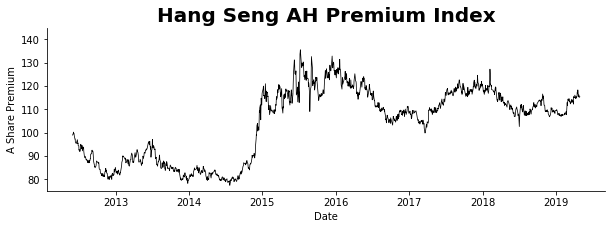

In [29]:
fig, ax1 = plt.subplots(figsize= (10,3))
x1 = final_indiv.index.tolist()
y1 = ah_index.tolist()
#formating plot
ax1.plot(x1, y1, color = 'black', linewidth = .75)
ax1.set_title("Hang Seng AH Premium Index", fontsize = 20, fontweight = 'bold')
ax1.set_xlabel("Date")
ax1.set_ylabel("A Share Premium")
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False) 
ax1.set_ylim(75,145)





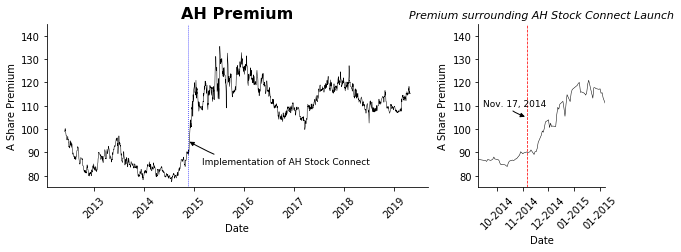

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (10,3))
gs = gridspec.GridSpec(1,2,width_ratios = [3,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
x1 = ah_index.index.tolist()
y1 = ah_index.tolist()
#formating plot
ax1.plot(x1, y1, color = 'black', linewidth = .5)
ax1.set_title("AH Premium", fontsize = 16, fontweight = 'bold')
ax1.set_xlabel("Date")
ax1.set_ylabel("A Share Premium")
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False) 
ax1.set_ylim(75,145)

#add AH Stock Connect start line
ax1.axvline(datetime(2014,11,17), linestyle = 'dotted', color = 'blue', linewidth = .75)
#add annotations to first plot
ax1.annotate(
    "Implementation of AH Stock Connect",
    xy = (datetime(2014,11,17), 95),
    xytext = (datetime(2015,3,1),85),
    arrowprops={
        "arrowstyle": "-|>", 
        "connectionstyle": "angle3,angleA=25,angleB=150",
        "color": "black"
        },
    fontsize=9, 
)

x2 = ah_index.index.tolist()
y2 = ah_index.tolist()
ax2.plot(x1, y1, color = 'black', linewidth = .5)

#formating plot
ax2.set_title("Premium surrounding AH Stock Connect Launch", fontsize = 11, fontstyle = 'oblique')
ax2.set_xlabel("Date")
ax2.set_ylabel("A Share Premium")
ax2.spines["top"].set_visible(False) 
ax2.spines["right"].set_visible(False) 
ax2.set_ylim(75,145)
ax2.set_xlim(datetime(2014,10,1),datetime(2015,2,1))

#change axis labels to months
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%m-%Y')
ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(months_fmt)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))

#add AH Stock Connect start line
ax2.axvline(datetime(2014,11,17), linestyle = 'dashed', color = 'red', linewidth = .75)

#add annotations to second plot
ax2.annotate(
    "Nov. 17, 2014",
    xy = (datetime(2014,11,17), 105),
    xytext = (datetime(2014,10,5),110),
    arrowprops={
        "arrowstyle": "-|>", 
        "connectionstyle": "angle3,angleA=20,angleB=160",
        "color": "black"
        },
    fontsize=9, 
)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

In [31]:
ah_df = pd.DataFrame(data = ah_index, index = ah_index.index)
ah_df.columns = ['Index']
ah_df.head(4)

,Index
2012-06-01,98.916186
2012-06-04,99.513119
2012-06-05,99.958836
2012-06-06,100.202850


In [32]:
ah_df['Rolling StDev'] = ah_df['Index'].rolling(window = 30).std()
ah_df['Rolling Mean'] = ah_df['Index'].rolling(window = 90).mean()

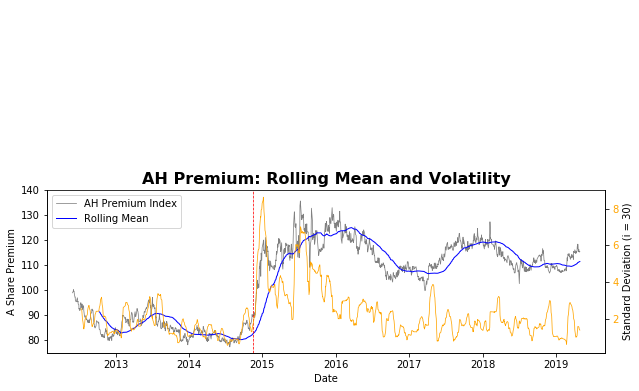

In [33]:
fig, ax1 = plt.subplots(figsize= (10,3))
x1 = final_indiv.index.tolist()
y1 = ah_index.tolist()
x2 = ah_df.index.tolist()
y2 = ah_df['Rolling Mean'].tolist()
x3 = x2
y3 = ah_df['Rolling StDev'].tolist()
#formating plot
ax1.plot(x1, y1, label = "AH Premium Index", color = 'grey', linewidth = .75)
ax1.plot(x2, y2, label = "Rolling Mean", color = 'blue', linewidth = 1)


ax1.set_title("AH Premium: Rolling Mean and Volatility", fontsize = 16, fontweight = 'bold')
ax1.set_xlabel("Date")
ax1.set_ylabel("A Share Premium")
ax1.spines["top"].set_visible(False) 
ax2.spines["top"].set_visible(False) 
ax1.set_ylim(75,140)

#add AH Stock Connect start line
ax1.axvline(datetime(2014,11,17), linestyle = 'dashed', color = 'red', linewidth = .75)
#add annotations to first plot
ax1.annotate(
    "Implementation of AH Stock Connect",
    xy = (datetime(2014,11,17), 185),
    xytext = (datetime(2012,4,1),210),
    arrowprops={
        "arrowstyle": "-|>", 
        "connectionstyle": "angle3,angleA=20,angleB=160",
        "color": "black"
        },
    fontsize=9, 
)

#second axis
ax2 = ax1.twinx()
ax2.tick_params(axis = 'y', labelcolor = 'orange')
ax2.set_ylabel('Standard Deviation (i = 30)')
ax2.plot(x3, y3, color = 'orange', linewidth = 0.75)


ax1.legend(loc = 'upper left')

Text(0.5, 1.0, 'AH Premium Confidence Interval')

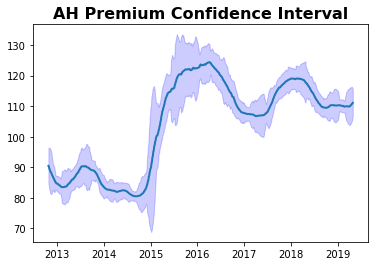

In [34]:
ah_df = pd.DataFrame(data = ah_index, index = ah_index.index)
smooth = ah_df.rolling(100).mean()
path_interval = ah_df.rolling(50).std()
plt.plot(smooth, linewidth = 2)
plt.fill_between(path_interval.index, (smooth-2*path_interval)[0],(smooth+2*path_interval)[0], color = 'b', alpha = 0.2)
plt.title('AH Premium Confidence Interval', fontsize = 16, fontweight = 'bold')

In [35]:
heavy = [1, 2, 3, 4 , 5]
light = [46, 47, 48, 49, 50]
heaviest10pct = final_indiv[heavy]
lightest10pct = final_indiv[light]
heaviest10pct['Net'] = heaviest10pct.sum(axis = 1)/5
lightest10pct['Net'] = lightest10pct.sum(axis = 1)/5
heaviest10pct = heaviest10pct['Net']
lightest10pct = lightest10pct['Net']
type(heaviest10pct)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pandas.core.series.Series

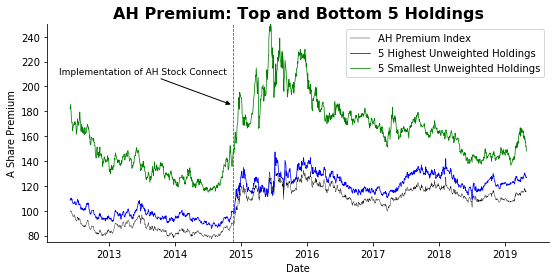

In [36]:
fig, ax1 = plt.subplots(figsize= (9,4))
x1 = final_indiv.index.tolist()
y1 = ah_index.tolist()
x2 = heaviest10pct.index.tolist()
y2 = heaviest10pct.tolist()
x3 = lightest10pct.index.tolist()
y3 = lightest10pct.tolist()
#formating plot
ax1.plot(x1, y1, label = "AH Premium Index", color = 'black', linewidth = .375)
ax1.plot(x2, y2, label = "5 Highest Unweighted Holdings", color = 'blue', linewidth = .75)
ax1.plot(x3, y3, label = "5 Smallest Unweighted Holdings", color = 'green', linewidth = .75)
ax1.set_title("AH Premium: Top and Bottom 5 Holdings", fontsize = 16, fontweight = 'bold')
ax1.set_xlabel("Date")
ax1.set_ylabel("A Share Premium")
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False) 
ax1.set_ylim(75,250)

#add AH Stock Connect start line
ax1.axvline(datetime(2014,11,17), linestyle = 'dashed', color = 'red', linewidth = .75)
#add annotations to first plot
ax1.annotate(
    "Implementation of AH Stock Connect",
    xy = (datetime(2014,11,17), 185),
    xytext = (datetime(2012,4,1),210),
    arrowprops={
        "arrowstyle": "-|>", 
        "connectionstyle": "angle3,angleA=20,angleB=160",
        "color": "black"
        },
    fontsize=9, 
)

#handles, labels = ax1.get_legend_handles_labels()
#ax1.legend(handles, labels)
ax1.legend(loc = 'upper right')